# Digit Recognizer Kaggle Competition

**Authors:** Dermot O'Brien
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

## Data Understanding

Describe the data being used for this project.
***

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [2]:
# Import the training and testing data
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [3]:
# Take a look at the training data
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check the shape of train and test data
print('Train Shape:', train_df.shape)
print('Test Shape: ', test_df.shape)

Train Shape: (42000, 785)
Test Shape:  (28000, 784)


/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


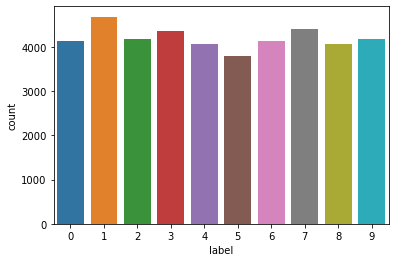

In [6]:
# Visualize count for each digit in train data
sns.countplot('label',data=train_df)
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

### Create X and y datasets for train and test data

In [7]:
X_train = train_df.drop('label',axis=1)
y_train = train_df['label']
X_test = test_df

### Scaling Data
Since the number for pixels varies between 0-255, we are going to scale the data by diving each pixel by 255

In [8]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Reshape Data

In [9]:
X_train_scaled = X_train_scaled.values.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.values.reshape(-1,28,28,1)
X_train_scaled.shape, X_test_scaled.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### One-Hot Encoding

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(42000, 10)

### Train Test Split the training data

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)

X_train Shape: (31500, 28, 28, 1)
y_train Shape: (31500, 10)


### Visualize an image

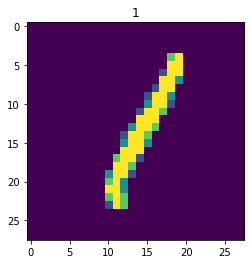

In [12]:
plt.imshow(X_train[0][:,:,0])
plt.title(y_train[0].argmax());

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

In [13]:
# Define the model
model = tf.keras.models.Sequential([
  # Layer 1
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Layer 2
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # Layer 3
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # FC 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0

In [14]:
#Define the callback function to stop training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [ ]:
# Adam Optimizer
#adam_opt = Adam(learning_rate=0.0005, name='adam')
#model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=50, epochs=20, callbacks=[callbacks], validation_data=(X_val, y_val))'''

In [ ]:
# Adam Results
# loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0491 - val_accuracy: 0.9888

In [15]:
# SGD optimizer
sgd_opt = SGD(learning_rate=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
model.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, callbacks=[callbacks], validation_data=(X_val, y_val))

Epoch 1/20
985/985 [==============================] - 53s 54ms/step - loss: 2.3020 - accuracy: 0.1103 - val_loss: 2.2993 - val_accuracy: 0.1836
Epoch 2/20
985/985 [==============================] - 54s 55ms/step - loss: 2.2993 - accuracy: 0.1497 - val_loss: 2.2960 - val_accuracy: 0.1303
Epoch 3/20
985/985 [==============================] - 55s 56ms/step - loss: 2.2963 - accuracy: 0.1722 - val_loss: 2.2919 - val_accuracy: 0.1549
Epoch 4/20
985/985 [==============================] - 55s 56ms/step - loss: 2.2924 - accuracy: 0.1890 - val_loss: 2.2854 - val_accuracy: 0.2168
Epoch 5/20
985/985 [==============================] - 56s 57ms/step - loss: 2.2861 - accuracy: 0.2081 - val_loss: 2.2733 - val_accuracy: 0.2989
Epoch 6/20
985/985 [==============================] - 55s 56ms/step - loss: 2.2720 - accuracy: 0.2252 - val_loss: 2.2438 - val_accuracy: 0.3842
Epoch 7/20
985/985 [==============================] - 149s 151ms/step - loss: 2.2306 - accuracy: 0.2303 - val_loss: 2.1301 - val_accurac

In [ ]:
# SGD Results
# loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0273 - val_accuracy: 0.9933

## Evaluation
Looks like the SGD Optimizer had a higher accuracy, 0.9987. Let's do some model evaluation now.

In [ ]:
model.evaluate()

In [20]:
results = model.predict(X_test_scaled)
results = np.argmax(results, axis=1)
y_pred = pd.Series(results,name="Label")

In [21]:
submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
submission.to_csv('./Submission_File/submission.csv', index=False)

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***